<a href="https://colab.research.google.com/github/ucfilho/Doubts_Students/blob/master/sorgo_ANN_otimiza_test_dez_21_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from mpl_toolkits.mplot3d import Axes3D, axes3d
from sklearn.preprocessing import StandardScaler
from google.colab import files
from sklearn.model_selection import train_test_split

In [2]:
n = input('Entre sua escolha (0,1 ou 2) para  (ponta negra, 1g100, dbk550:')
uploaded = files.upload()

Entre sua escolha (0,1 ou 2) para  (ponta negra, 1g100, dbk550:1


Saving Sorgo_1G100.csv to Sorgo_1G100 (8).csv


In [3]:
choose = ["sorgopontanegra.csv","Sorgo_1G100.csv","Sorgo_DBK550.csv"]
DAT=pd.read_csv(choose[int(n)])
print(DAT.head())

   Run      SO    IN       GL        Et      Fi          PD       ST  \
0    1   35.000  15.0  26.4169  44.1680  29.5200  61.344479  28.4169   
1    2   35.000  45.0  27.9425  53.0183  26.4942  73.636510  28.9425   
2    3  165.000  15.0  86.3195  33.5175  58.5103  46.552022  87.9128   
3    4  165.000  45.0  89.0621  33.3734  52.4981  46.351880  90.6521   
4    5   25.445  30.0  18.2450  48.5164  27.0320  67.383865  21.2450   

          Y1  
0  83.995385  
1  98.995123  
2  97.131251  
3  93.791185  
4  89.720201  


In [4]:
n

'1'

In [5]:
def zscore(x,xold):
  x = np.array(x)
  xold = np.array(xold)
  nrows, ncol = x.shape
  for j in range(ncol):
    avgx,stdx = np.average(xold[:,j]), np.std(xold[:,j])
    x[:,j]=(x[:,j]-avgx)/stdx
  return x

In [6]:
def z2val(x,xold): 
  x = np.array(x)
  xold = np.array(xold)
  nrows, ncol = x.shape
  for j in range(ncol):
    avgx,stdx = np.average(xold[:,j]), np.std(xold[:,j])
    x[:,j]=x[:,j]*stdx+avgx
  return x

In [7]:
DAT.columns=['Run', 'SO', 'IN', 'GL ', 'Et', 'Fi', 'PD', 'ST', 'Y1']

In [8]:
Col_Indep=['SO','IN']
names =[ 'Et']

In [9]:
nrows, ncols = DAT.shape
itrain, itest =train_test_split(range(nrows), test_size=0.2,random_state=11) # 2,3,4,5,6,7,8,9,10,11,22

In [10]:
# separa as colunas de interesse
x_train=DAT[Col_Indep].iloc[itrain,:].copy()
y_train=DAT[names].iloc[itrain,:].copy()
x_test = DAT[Col_Indep].iloc[itest,:].copy()
y_test = DAT[names].iloc[itest,:].copy()

In [11]:
xold, yold = DAT[Col_Indep],DAT[names]

In [12]:
x_train, y_train = zscore(x_train,xold), zscore(y_train,yold)
x_test, y_test = zscore(x_test,xold), zscore(y_test,yold)

In [13]:
x_train

array([[ 1.28823960e+00,  1.28810056e+00],
       [ 9.90877321e-05,  0.00000000e+00],
       [-1.47739809e+00,  0.00000000e+00],
       [ 1.47650630e+00,  0.00000000e+00],
       [ 9.90877321e-05,  1.47702197e+00],
       [-1.28804143e+00,  1.28810056e+00],
       [-1.28804143e+00, -1.28810056e+00],
       [ 9.90877321e-05,  0.00000000e+00]])

In [14]:
# define a rede neural 
def optmANN(x_train,x_test,y_train,y_test):
  resp_scored = []
  for i in range(1,10):
    r_calc =[]
    N_Hidden = i
    clf = MLPRegressor(solver='lbfgs',activation='tanh',
                      alpha=1e-5,hidden_layer_sizes=(N_Hidden), 
                        random_state=1)
    clf.fit(x_train, y_train)
    y_calc_train=clf.predict(x_train)
    y_calc_test=clf.predict(x_test)
    y_calc_train=pd.DataFrame(y_calc_train)
    y_calc_test=pd.DataFrame(y_calc_test)
    r2_test= r2_score(y_test,y_calc_test)
    r2_train = r2_score(y_train,y_calc_train)
    r_calc.append(i)
    r_calc.append(r2_train)
    r_calc.append(r2_test)
    resp_scored.append(r_calc)

  df = pd.DataFrame(resp_scored,columns=['hidden','r2 train','r2 test'])
  return df

In [15]:
df = optmANN(x_train,x_test,y_train,y_test)
df

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when 

,hidden,r2 train,r2 test
0,1,0.938987,-7.021263
1,2,0.999943,-404.098894
2,3,0.999943,-54.750325
3,4,0.999943,-27.250957
4,5,0.999943,-40.297146
5,6,0.999943,-34.101133
6,7,0.999943,-20.138445
7,8,0.999943,-39.146222
8,9,0.999943,-89.215646


In [16]:
# define a rede neural 
N_Hidden= 3
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(N_Hidden), 
                    random_state=1)
clf.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, hidden_layer_sizes=3,
             random_state=1, solver='lbfgs')

In [17]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)

In [18]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)

In [19]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train, y_calc_test = z2val(y_calc_train,yold), z2val(y_calc_test,yold)
y_train, y_test = z2val(y_train,yold), z2val(y_test,yold)

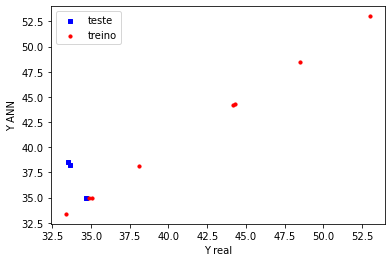

In [20]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(y_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_train,y_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Y ANN')
plt.xlabel('Y real')
plt.show()

In [21]:
r2_test= r2_score(y_test,y_calc_test)
r2_train = r2_score(y_train,y_calc_train)
print('r2 (train)=',r2_train)
print('r2 (test)=',r2_test)

r2 (train)= 0.9999425898151986
r2 (test)= -54.750325086447404


In [22]:
y_calc_train

array([[33.37251186],
       [34.96335801],
       [48.51458914],
       [38.10544476],
       [44.32370895],
       [53.01553198],
       [44.1679166 ],
       [34.96335801]])

In [23]:
y_train

array([[33.3734],
       [35.0649],
       [48.5164],
       [38.1063],
       [44.3208],
       [53.0183],
       [44.168 ],
       [34.8617]])

In [24]:
DAT

,Run,SO,IN,GL,Et,Fi,PD,ST,Y1
0,1,35.000,15.0,26.4169,44.1680,29.5200,61.344479,28.4169,83.995385
1,2,35.000,45.0,27.9425,53.0183,26.4942,73.636510,28.9425,98.995123
2,3,165.000,15.0,86.3195,33.5175,58.5103,46.552022,87.9128,97.131251
3,4,165.000,45.0,89.0621,33.3734,52.4981,46.351880,90.6521,93.791185
4,5,25.445,30.0,18.2450,48.5164,27.0320,67.383865,21.2450,89.720201
5,6,174.500,30.0,114.5361,38.1063,49.5622,52.925473,115.8661,88.611969
6,7,100.000,12.8,60.9536,33.6167,41.3100,46.689903,62.9438,82.462901
7,8,100.000,47.2,60.9438,44.3208,44.3740,61.556647,69.3738,98.643409
8,9,100.000,30.0,59.2752,35.0649,52.5980,48.701239,60.8452,88.982026
9,10,100.000,30.0,59.7404,34.8617,46.9550,48.419061,61.2704,87.852524


In [25]:
def function(x, clf=clf):
  n = len(x)
  x=x.reshape((1, n))
  df = pd.DataFrame(x)
  Y=clf.predict(df)
  fun=Y*(-1)
  return fun


In [26]:
nrows,ncols= x_train.shape
bounds = [(-1,1)]*ncols
Condicoes = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=100, popsize=50,recombination=0.5)


In [27]:
n = len(bounds)
Condicoes=pd.DataFrame(Condicoes.x.reshape(1, n))
Condicoes= z2val(Condicoes,xold)
resp = pd.DataFrame(Condicoes,columns=Col_Indep)
print(resp)
Y=clf.predict(Condicoes).reshape(-1,1)
Y =  z2val(Y,yold)
print(Y)

          SO         IN
0  49.534667  41.645054
[[38.50899917]]


In [28]:
# separa as colunas de interesse
x_train, y_train = DAT[Col_Indep],DAT[names]
x_train, y_train = zscore(x_train,xold), zscore(y_train,yold)

In [29]:
df = optmANN(x_train,x_train,y_train,y_train)
df

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
S

,hidden,r2 train,r2 test
0,1,0.946683,0.946683
1,2,0.991994,0.991994
2,3,0.999293,0.999293
3,4,0.999854,0.999854
4,5,0.999844,0.999844
5,6,0.999853,0.999853
6,7,0.999854,0.999854
7,8,0.999854,0.999854
8,9,0.999854,0.999854


In [30]:
# define a rede neural 
N_Hidden= 3
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(N_Hidden), 
                    random_state=1)
clf.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='tanh', alpha=1e-05, hidden_layer_sizes=3,
             random_state=1, solver='lbfgs')

In [31]:
def function(x, clf=clf):
  n = len(x)
  x=x.reshape((1, n))
  df = pd.DataFrame(x)
  Y=clf.predict(df)
  fun=Y*(-1)
  return fun


In [32]:
nrows,ncols= x_train.shape
bounds = [(-1,1)]*ncols
Condicoes = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=100, popsize=50,recombination=0.5)

In [33]:
n = len(bounds)
Condicoes=pd.DataFrame(Condicoes.x.reshape(1, n))
Y=clf.predict(Condicoes).reshape(-1,1)

Condicoes= z2val(Condicoes,xold)
resp = pd.DataFrame(Condicoes,columns=Col_Indep)
print(resp)
Y =  z2val(Y,yold)
print(Y)

          SO         IN
0  49.534667  41.645054
[[53.13650228]]
